In [290]:
import os,sys
import scanpy as sc
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from mebocost_test import mebocost


<module 'mebocost_test.mebocost' from '/Users/rongbinzheng/Documents/BCH/ChenLab/Metabolism/MEBOCOST_Verisons/v1.0.4/MEBOCOST/src/mebocost_test/mebocost.py'>

## MEBOCOST for predicting metabolite-based cell-cell communications
<p> In this tutorial, we apply MEBOCOST on a demo dataset which 200 cells were sampled from a HNSC scRNA-seq data (GSE103322).
    
Note: since this demo data was down-sampled from original scRNA-seq, the predicted result of communication might looks not biologically meaningful. The goal of this notebook is to show the step-by-step analysis</p>

## 1. Create mebocost object
<p> Users can pass data either by adata scanpy object (1.1 reccomended), or by python pandas data frame (1.2)</p>

### 1.1 get expression and cell annotation data from scanpy object

In [9]:
adata = sc.read_h5ad('../data/demo/raw_scRNA/demo_HNSC_200cell.h5ad')
## check adata (cells, genes)
print(adata.shape)
### make sure your adata cover all genes and all cells
### if not, you may want to load all genes saved in raw by doing:
# adata = adata.raw.copy()


(200, 18241)


##### create mebocost object

In [14]:
## initiate the mebocost object
### import expression data by scanpy adata object
mebo_obj = mebocost.create_obj(
                        adata = adata,
                        group_col = ['celltype'],
                        met_est = 'mebocost',
                        config_path = './mebocost.conf',
                        exp_mat=None,
                        cell_ann=None,
                        species='human',
                        met_pred=None,
                        met_enzyme=None,
                        met_sensor=None,
                        met_ann=None,
                        scFEA_ann=None,
                        compass_met_ann=None,
                        compass_rxn_ann=None,
                        gene_network=None,
                        gmt_path=None,
                        cutoff_exp='auto',
                        cutoff_met='auto',
                        cutoff_prop=0.25,
                        sensor_type=['Receptor', 'Transporter', 'Nuclear Receptor'],
                        thread=8
                        )


[May 13, 2024 14:01:20]: We get expression data with 18241 genes and 200 cells.
[May 13, 2024 14:01:20]: Data Preparation Done in 0.0727 seconds


### 1.2 get expression and cell annotation from external files (skip if you have done 1.1)
<p>Users can provide exp_mat (scRNA-seq gene-by-cell expression matrix) and cell_ann (cell-by-annoatation matrix) from external files, such as .csv, .tsv, and .txt files, to MEBOCOST for mCCC analysis. Please refer to pandas read_csv functions to read those files (<a href=https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html>read_csv</a>) into Python. In the case that users want to use expression data and meta data from Seurat in R. It is strongly recommended first writing out expression matrix and meta data (cell annotation) from Seurat in R. Once the expression and meta data were saved in your local, those files can be read into Python by pandas and then pass to mebocost as the instructions in following. Please make sure you have total genes in the table, rather than only highly variable genes.</p>


In [287]:
### pass expression data and cell annotation table by pandas data frame
### taking exp_mat and cell_all from the above 
### read expression data from a external file
exp_mat = pd.read_csv(your_exp_data_file)
cell_ann = pd.read_csv(your_cell_ann_data_file)

mebo_obj = mebocost.create_obj(
                        adata = None,
                        group_col = ['celltype'],
                        met_est = 'mebocost',
                        config_path = './mebocost.conf',
                        exp_mat=exp_mat,
                        cell_ann=cell_ann,
                        species='human',
                        met_pred=None,
                        met_enzyme=None,
                        met_sensor=None,
                        met_ann=None,
                        scFEA_ann=None,
                        compass_met_ann=None,
                        compass_rxn_ann=None,
                        gene_network=None,
                        gmt_path=None,
                        cutoff_exp='auto',
                        cutoff_met='auto',
                        cutoff_prop=0.25,
                        sensor_type=['Receptor', 'Transporter', 'Nuclear Receptor'],
                        thread=8
                        )


#### 2.1 Aggregating metabolite enzyme expression [Optional]
<li> Note: this estimation have been already incoperated in mebo_obj.infer_commu, so only run this step separately if you just want to aggregate enzyme expression for metabolites and stop from doing further analysis.</li>

In [4]:
## 【optional】only aggregate metabolite enzyme expression for cells 
## this estimation actually included in infer_commu function, if you want 
## two steps include loading config and running estimator
mebo_obj._load_config_()
mebo_obj.estimator()


[July 19, 2022 14:44:14]: Load config and read data based on given species [human].
[July 19, 2022 14:44:17]: Estimtate metabolite level using mebocost


In [5]:
## check the enzyme expression aggregating result
met_mat = pd.DataFrame(mebo_obj.met_mat.toarray(),
                      index = mebo_obj.met_mat_indexer,
                      columns = mebo_obj.met_mat_columns)
## print head
met_mat.head()


HNSCC5_p14_HNSCC5_P14_LN_H02  HNSCC_17_P10_C11_S227_comb  \
HMDB0003450                      0.000000                    0.000000   
HMDB0003948                      0.255695                    0.303540   
HMDB0003712                      0.204556                    0.242832   
HMDB0003945                      0.227284                    0.366798   
HMDB0003949                      0.255695                    0.303540   

             HNSCC6_p15_HNSCC6_P15_LN_D05  HNSCC25_P2_A10_S10_comb  \
HMDB0003450                      0.000000                 0.000000   
HMDB0003948                      0.267465                 0.000000   
HMDB0003712                      0.302952                 0.000000   
HMDB0003945                      0.383685                 0.222933   
HMDB0003949                      0.267465                 0.000000   

             HNSCC16_P4_HNSCC16_P4_B11  HNSCC18_P7_F06_S162_comb  \
HMDB0003450                   0.000000                  0.000000   
HMDB0003948                   0.413994                  0.146958   
HMDB0003712                   0.331195                  0.117567   
HMDB0003945                   0.447552                  0.441383   
HMDB0003949                   0.413994                  0.146958   

             HNSCC25_P4_E04_S244_comb  HNSCC20_P5_pri_A01_S1_comb  \
HMDB0003450                       0.0                    0.000000   
HMDB0003948                       0.0                    0.327930   
HMDB0003712                       0.0                    0.342155   
HMDB0003945                       0.0                    0.480210   
HMDB0003949                       0.0                    0.327930   

             HN28_P5_F10_S262_comb  HNSCC17_P13_E12_S348_comb  ...  \
HMDB0003450               0.000000                   0.000000  ...   
HMDB0003948               0.210271                   0.000835  ...   
HMDB0003712               0.235718                   0.297141  ...   
HMDB0003945               0.296026                   0.000742  ...   
HMDB0003949               0.210271                   0.000835  ...   

             HNSCC6_p16_HNSCC6_P16_B03  HNSCC8_1ant_HNSCC8_1ant_A06  \
HMDB0003450                   0.000000                     0.000000   
HMDB0003948                   0.225085                     0.183810   
HMDB0003712                   0.180068                     0.147048   
HMDB0003945                   0.200076                     0.163386   
HMDB0003949                   0.225085                     0.183810   

             HNSCC26_P24_H06_S378_comb  HNSCC16_P2_F09_S69_comb  \
HMDB0003450                   0.000000                 0.000000   
HMDB0003948                   0.359314                 0.002629   
HMDB0003712                   0.473624                 0.226876   
HMDB0003945                   0.319390                 0.249946   
HMDB0003949                   0.359314                 0.002629   

             HNSCC6_p14_hnscc6_p14_D12  HNSCC18_P2_F02_S158_comb  \
HMDB0003450                   0.000000                  0.000000   
HMDB0003948                   0.433498                  0.413497   
HMDB0003712                   0.421987                  0.330798   
HMDB0003945                   0.539379                  0.367553   
HMDB0003949                   0.433498                  0.413497   

             HNSCC16_P12_HNSCC16_P12_G10  HNSCC16_P14_HNSCC16_P14_H10  \
HMDB0003450                     0.000000                     0.000000   
HMDB0003948                     0.001104                     0.004354   
HMDB0003712                     0.000883                     0.003483   
HMDB0003945                     0.328898                     0.003870   
HMDB0003949                     0.001104                     0.004354   

             HNSCC6_p16_HNSCC6_P16_E07  HNSCC28_P13_A12_S204_comb  
HMDB0003450                   0.000000                   0.000000  
HMDB0003948                   0.202068                   0.313849  
HMDB0003712               

#### 2.2 communication inference

In [15]:
## metabolic communication inference
commu_res = mebo_obj.infer_commu(
                                n_shuffle=1000,
                                seed=12345, 
                                Return=True, 
                                thread=None,
                                save_permuation=False,
                                min_cell_number = 1,
                                pval_method='permutation_test_fdr',
                                pval_cutoff=0.05
                            )


[May 13, 2024 14:01:23]: Load config and read data based on given species [human].
[May 13, 2024 14:01:25]: Estimtate metabolite level using mebocost
[May 13, 2024 14:01:40]: Infer communications
[May 13, 2024 14:01:40]: Sensor type used ['Transporter', 'Receptor', 'Nuclear Receptor']
[May 13, 2024 14:01:40]: Parameters: {shuffling: 1000 times, random seed: 12345, thread: 8}
[May 13, 2024 14:01:40]: met_sensor: (317, 8)
[May 13, 2024 14:01:40]: avg_exp: (2100, 11) for (gene, cell) of needed
[May 13, 2024 14:01:40]: avg_met: (587, 11) for (metabolite, cell) of needed
[May 13, 2024 14:01:40]: shuffling 1000 times for generating backgroud
[May 13, 2024 14:01:40]: take exp and met avg for shuffling
[May 13, 2024 14:01:52]: thread: 8
[May 13, 2024 14:01:52]: ABCA1 ~ HMDB0006247
[May 13, 2024 14:01:53]: CD36 ~ HMDB0003276
[May 13, 2024 14:01:53]: Normalizing Cluster Mean and Calculating Communication Score
[May 13, 2024 14:01:53]: ADORA1 ~ HMDB0000050
[May 13, 2024 14:01:54]: DRD4 ~ HMDB0000

[March 17, 2023 14:17:26]: Normalizing Cluster Mean and Calculating Communication Score[March 17, 2023 14:17:26]: ADRA2C ~ HMDB0000216

[March 17, 2023 14:17:26]: Calculating P-value
[March 17, 2023 14:17:28]: Normalizing Cluster Mean and Calculating Communication Score
[March 17, 2023 14:17:28]: Calculating P-value
[March 17, 2023 14:17:28]: NR3C1 ~ HMDB0001547
[March 17, 2023 14:17:29]: RARA ~ HMDB0001358
[March 17, 2023 14:17:29]: P2RY14 ~ HMDB0000286
[March 17, 2023 14:17:30]: Normalizing Cluster Mean and Calculating Communication Score
[March 17, 2023 14:17:30]: Normalizing Cluster Mean and Calculating Communication Score
[March 17, 2023 14:17:30]: VDR ~ HMDB0000876
[March 17, 2023 14:17:30]: Normalizing Cluster Mean and Calculating Communication Score
[March 17, 2023 14:17:30]: Calculating P-value
[March 17, 2023 14:17:31]: Calculating P-value
[March 17, 2023 14:17:31]: Calculating P-value
[March 17, 2023 14:17:32]: Normalizing Cluster Mean and Calculating Communication Score
[Ma

In [203]:
print('Number of mCCC detected by enzyme and sensor co-expression: ', commu_res.shape[0])


Number of mCCC detected by enzyme and sensor co-expression:  324


#### 2.3 save mebocost object and reload object
#### MEBOCOST object can be saved as a pickle file which is a python-based file format using less disk space
##### save

In [77]:
# ### save 
mebocost.save_obj(obj = mebo_obj, path = './demo_HNSC_200cell_commu.pk')


##### reload

In [251]:
## re-load the previous object if needed
mebo_obj = mebocost.load_obj('./demo_HNSC_200cell_commu.pk')


[May 13, 2024 16:26:49]: Data Preparation Done in 0.0029 seconds


In [144]:
## check cutoff
print('sensor_exp cutoff: %s'%mebo_obj.cutoff_exp)
print('metabolite_agg_enzyme cutoff: %s'%mebo_obj.cutoff_met)


sensor_exp cutoff: 0.013208496384322643
metabolite_agg_enzyme cutoff: 0.03198429848998785


#### 2.4 Integrate COMPASS to constrain mCCC analysis by efflux and influx rates
<p>This can be done by running COMPASS, a tool for compute flux rates, using single-cell data. Please install the COMPASS following the instructions at https://yoseflab.github.io/Compass/install.html</p>


In [46]:
### Running COMPASS for each cell type by the average gene expression
### output average gene expression
avg_exp = sc.get.aggregate(adata, by = 'celltype', func='mean')
avg_exp = pd.DataFrame(avg_exp.layers['mean'], index = avg_exp.obs_names, columns = avg_exp.var_names).T
# ## do un log since COMPASS will take log in the algorithm
avg_exp = avg_exp.apply(lambda col: np.exp(col)-1)
avg_exp.to_csv('avg_exp_mat.tsv', sep = '\t')


<p>Running the COMPASS using avg_exp_mat.tsv, and get secretion.tsv and uptake.tsv results</p>
<p>Example command line in bash:</p>

```shell
exptsv_path=your_folder/avg_exp_mat.tsv
species=homo_sapiens
output_path=your_folder/compass_res
temp_path=your_folder/compass_res_tmp
core=8
compass=/root/miniconda3/bin/compass

echo '++++ run compass'
## since it is cell type level analysis, so lambda set to 0
$compass --data $exptsv_path --num-thread $core --species $species --output-dir $output_path --temp-dir $temp_path --calc-metabolites --lambda 0
echo 'Finished'
```

#### Update the commu_res in the mebocost object based on secretion.tsv and uptake.tsv


In [252]:
## apply constraint on compass flux result
updated_res = mebo_obj._ConstainFlux_(compass_folder='../data/demo/compass_res/',
                                    efflux_cut='auto',
                                    influx_cut='auto',
                                    inplace=False)



efflux_cut: 10.105265015312568
influx_cut: 2.352030916167703


In [253]:
## update to the object
mebo_obj.commu_res = updated_res
print('Number of mCCC detected by further flux contrains', updated_res.shape[0])


Number of mCCC detected by further flux contrains 196


#### [Optinal] 2.6 Examing whether the mCCC were confounded by highly abundant metabolites in the blood.

<li>We have tested the correlation between mCCC scores and blood metabolite concentrations across multiple samples. Generally, we did not observe any strong confounding from blood metabolites to MEBOCOST mCCC scores. Nevertheless, we provide a function for users to examine such confounding in their own data and offer correction through a linear regression model. The corrected mCCC score will be calculated by subtracting the predicted values in the regression model.</li>
<li>To do this, we collected the metabolite concentration (uM) in <b>human</b> blood from the HMDB database. Median values across multiple donors/patients were used in this analysis, which can be found at data/mebocost_db/common/hmdb_blood_metabolite_concentration.tsv.</li>
<li>Users can also provide their own metabolomics data from blood samples to examine the confounding. The required data should be a table with two columns corresponding to metabolite name and concentration, formatted as tab-delimited and without a header.</li>


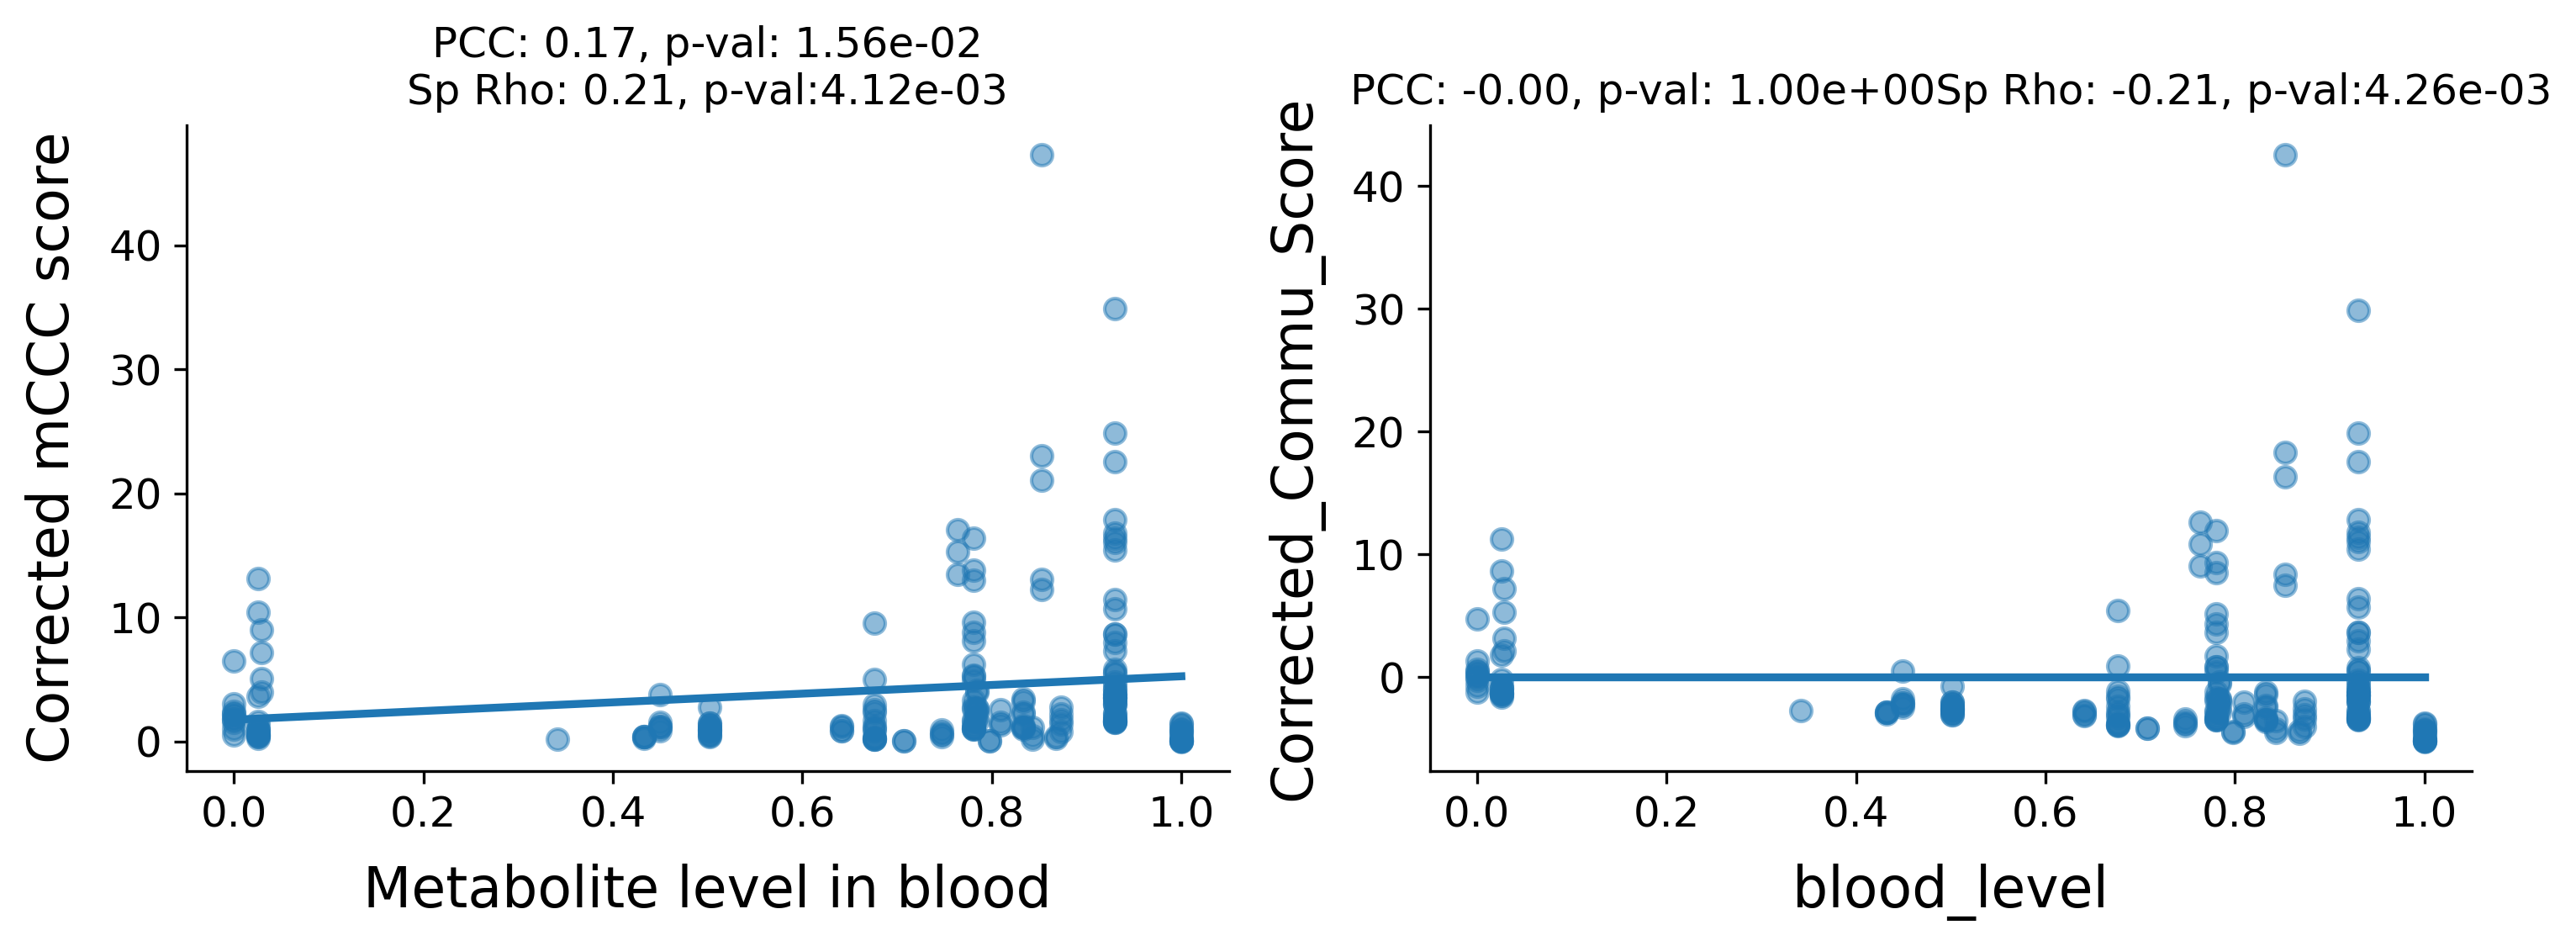

In [254]:
corrected_commu_res = mebo_obj._blood_correct_test_(met_cont_file='../data/mebocost_db/common/hmdb_blood_metabolite_concentration.tsv',
                                commu_score_col='Commu_Score',
                                title='',
                                pdf=False)


<li>The figure on the left shows a weak correlation between mCCC scores and blood metabolite levels. However, users can still focus on mCCC events with confounding-corrected results. To do this, mCCC events with corrected scores less than 0 will be filtered out because they could possibly be confounded by metabolites from the blood system. The following script archive this:</li>

In [260]:
### update object to focus on corrected mCCC
mebo_obj.commu_res = corrected_commu_res.query('Corrected_Commu_Score > 0')


### 2.7 Now explore the mCCC result by Interactive Visualization Fuction
<p>To provide a user-friendly visualization of mebocost result, especially for those datasets with large number of communication events, notebook interactive view shed lights in. We developed the Jupyter interactive widgets to mimic webpage.
NOTE: this function can only be used in Jupyter notebook</p> 

In [261]:
## here, users can click and plot figures

## interactive view module mimic a website but all go with our default parameters
mebo_obj.communication_in_notebook(pval_method='permutation_test_fdr',
                                    pval_cutoff=0.05,
                                    comm_score_col='Commu_Score',
                                    comm_score_cutoff=None,
                                    cutoff_prop=None)


<b>Select and Click button to visulize</b>

### 2.8 You can also visualize mCCC result by generating figure manually

#### summary of the number of communication events

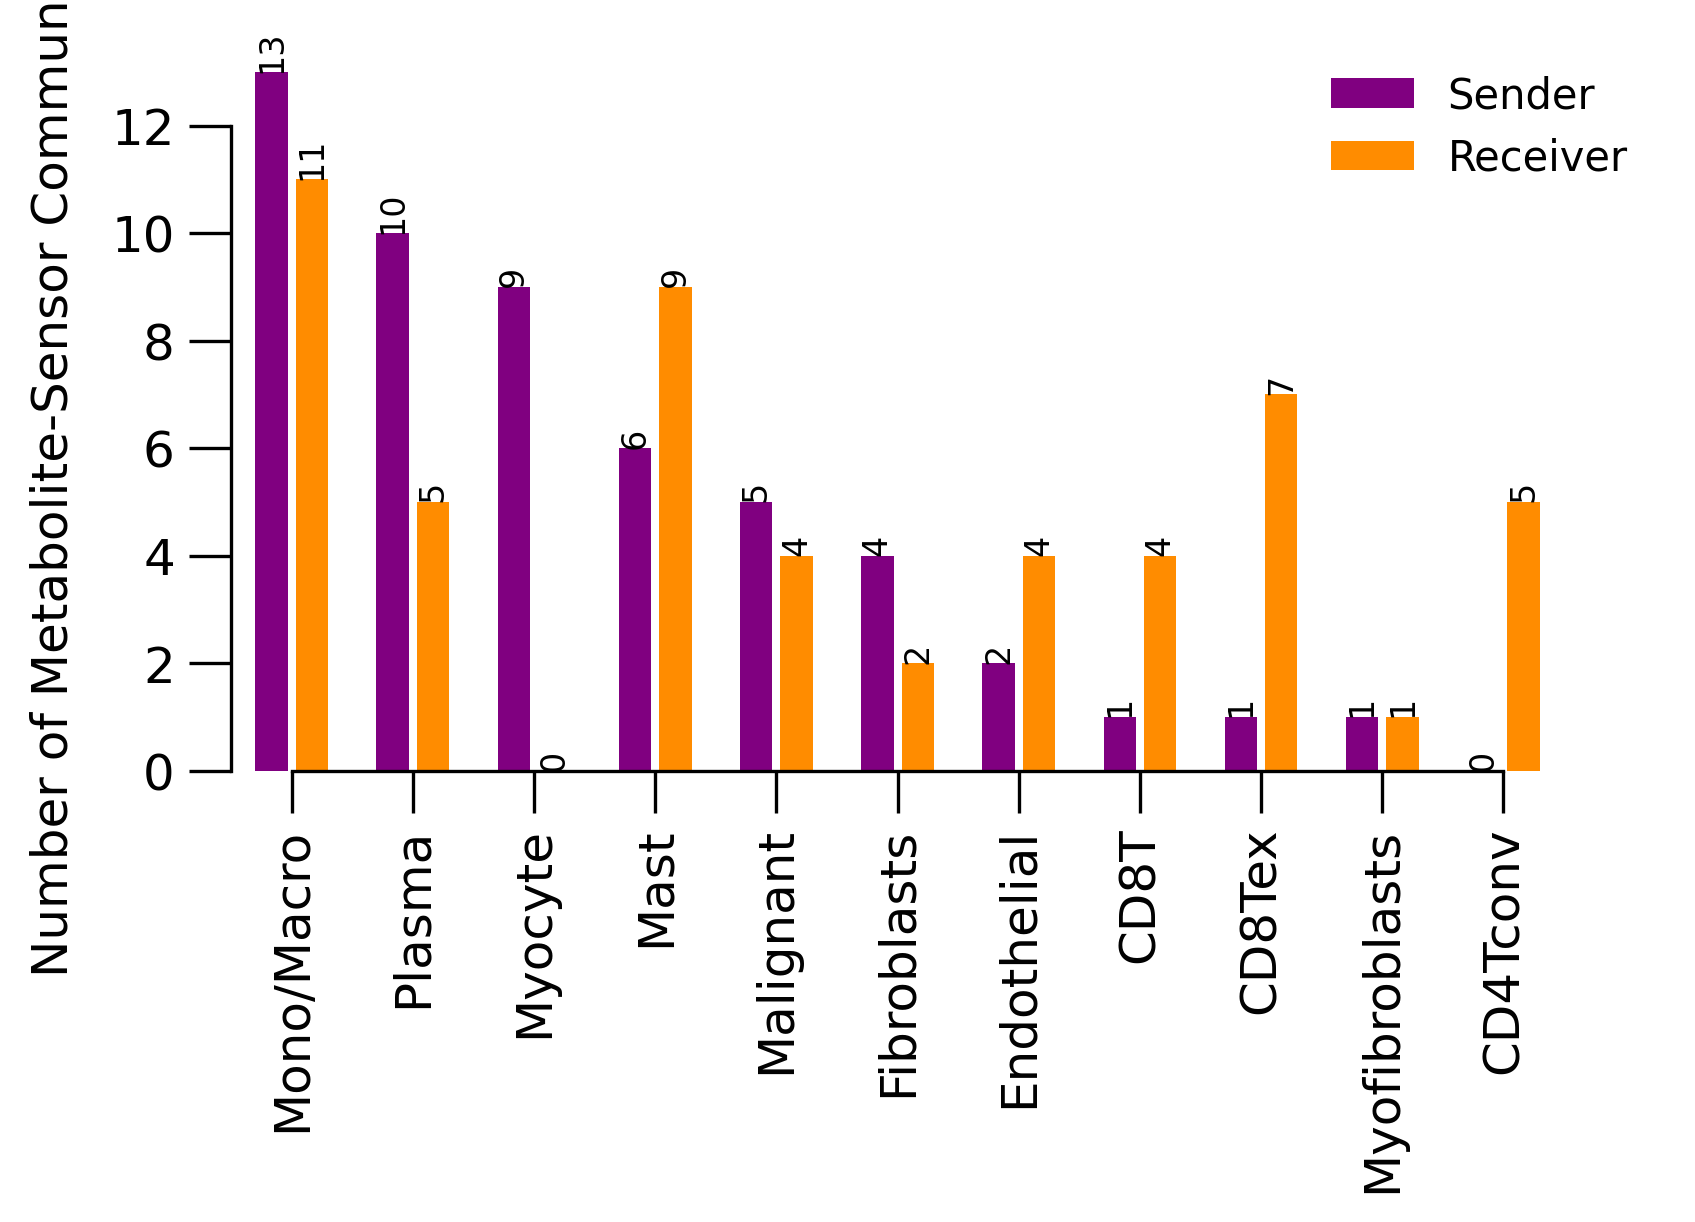

In [262]:
## sender and receiver event number
mebo_obj.eventnum_bar(
                    sender_focus=[],
                    metabolite_focus=[],
                    sensor_focus=[],
                    receiver_focus=[],
                    and_or='and',
                    pval_method='permutation_test_fdr',
                    pval_cutoff=0.05,
                    comm_score_col='Commu_Score',
                    comm_score_cutoff = 0,
                    cutoff_prop = 0.25,
                    figsize='auto',
                    save=None,
                    show_plot=True,
                    show_num = True,
                    include=['sender-receiver'],
                    group_by_cell=True,
                    colorcmap='tab20',
                    return_fig=False
                )



#### summay of communication in cell-to-cell network

[May 13, 2024 15:40:53]: show communication in cells by network plot


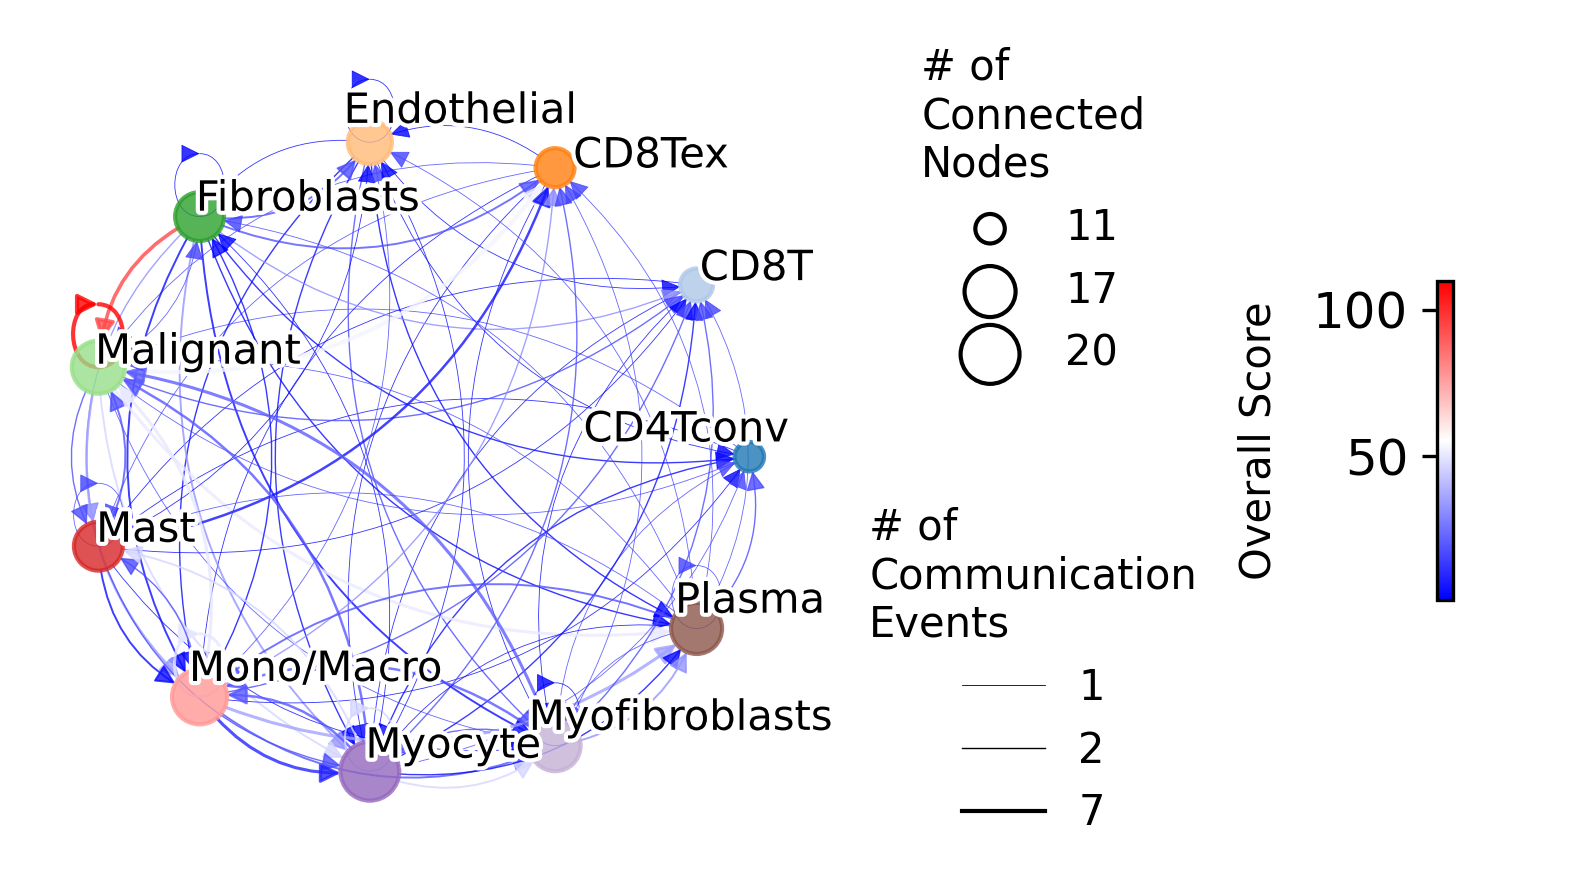

In [206]:
## circle plot to show communications between cell groups
mebo_obj.commu_network_plot(
                    sender_focus=[],
                    metabolite_focus=[],
                    sensor_focus=[],
                    receiver_focus=[],
                    and_or='and',
                    pval_method='permutation_test_fdr',
                    pval_cutoff=0.05,
                    node_cmap='tab20',
                    figsize='auto',
                    line_cmap='bwr',
                    line_color_vmin=None,
                    line_color_vmax=None,
                    linewidth_norm=(0.2, 1),
                    node_size_norm=(50, 200),
                    adjust_text_pos_node=True,
                    node_text_hidden = False,
                    node_text_font=10,
                    save=None,
                    show_plot=True,
                    comm_score_col='Commu_Score',
                    comm_score_cutoff=0,
                    text_outline=True,
                    return_fig=False
                )

### the "overall score" represent the sum of -log10(FDR) of detected metabolite-sensor communications between a pair of cell types



#### Showing the communication between sender and receiver in a dot plot

[May 13, 2024 15:41:00]: plot dot plot to show communication in cell type level


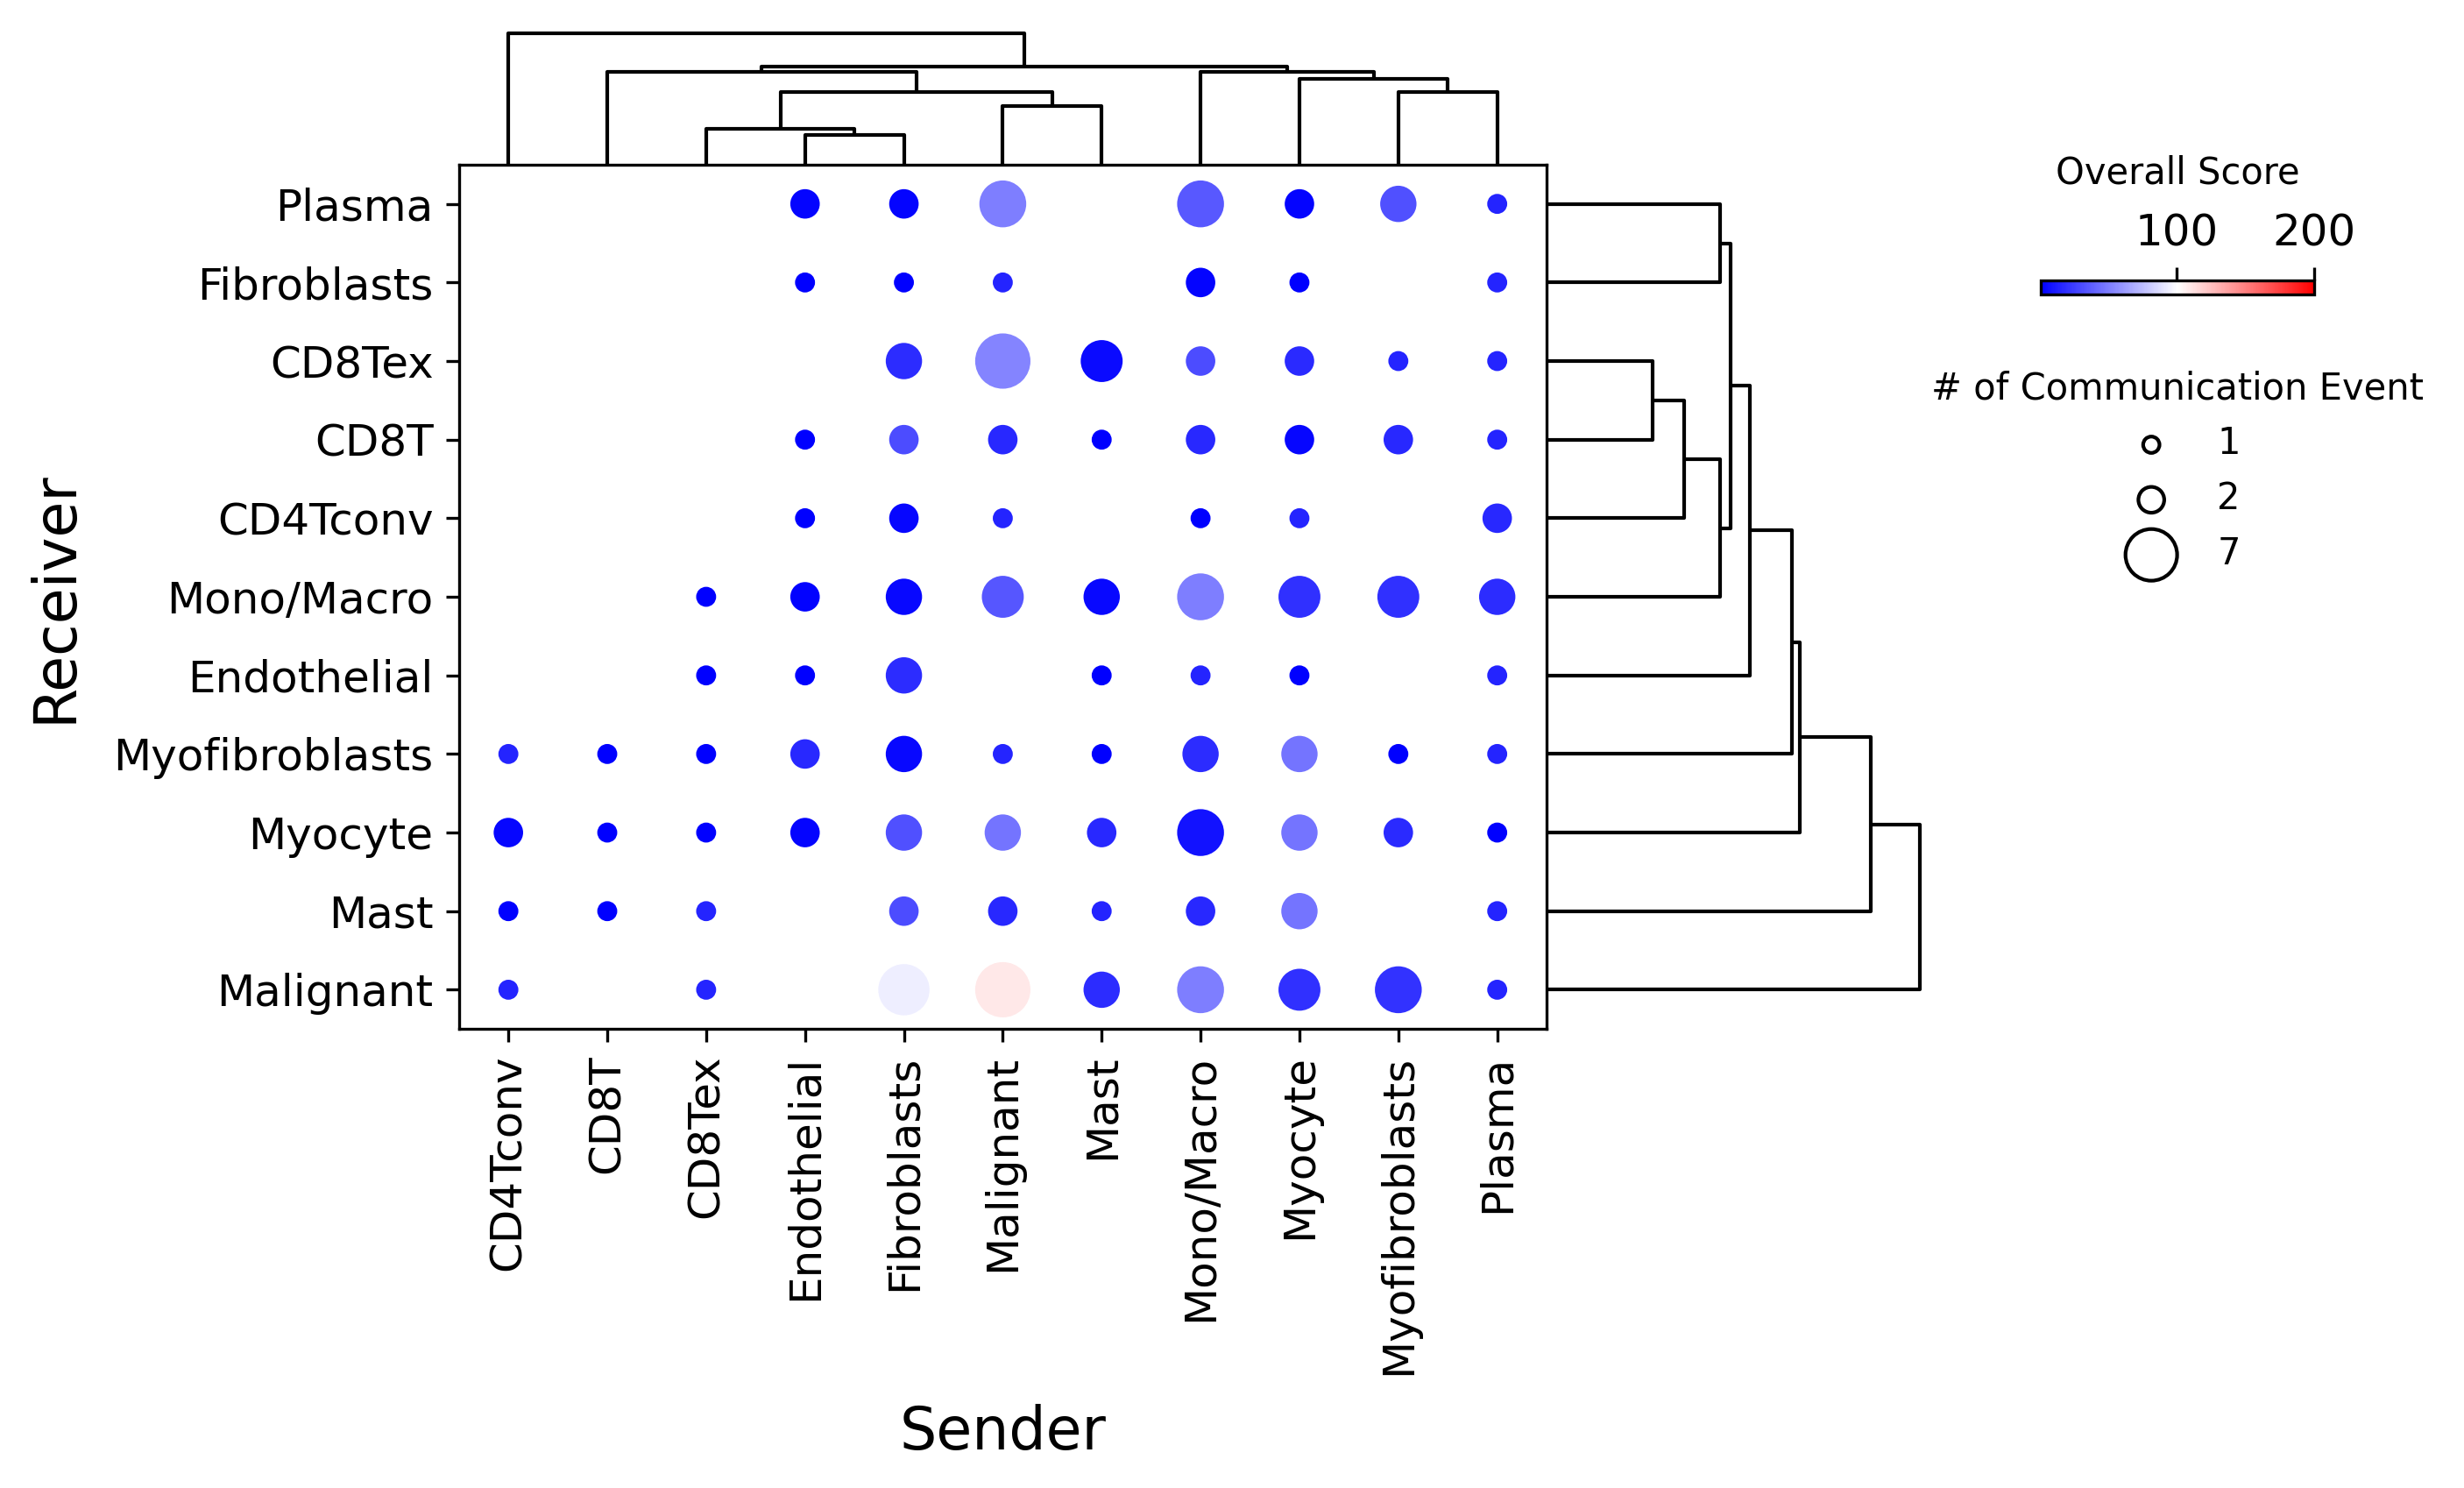

In [207]:
### dot plot to show the number of communications between cells

mebo_obj.count_dot_plot(
                        pval_method='permutation_test_fdr',
                        pval_cutoff=0.05,
                        cmap='bwr',
                        figsize='auto',
                        save=None,
                        dot_size_norm=(20, 200),
                        dot_color_vmin=None,
                        dot_color_vmax=200,
                        show_plot=True,
                        comm_score_col='Commu_Score',
                        comm_score_cutoff=0,
                        return_fig = False
                    )


#### Showing the detailed communications (sender-receiver vs metabolite-sensor) in a dot map

[May 13, 2024 15:41:05]: plot heatmap for significant result


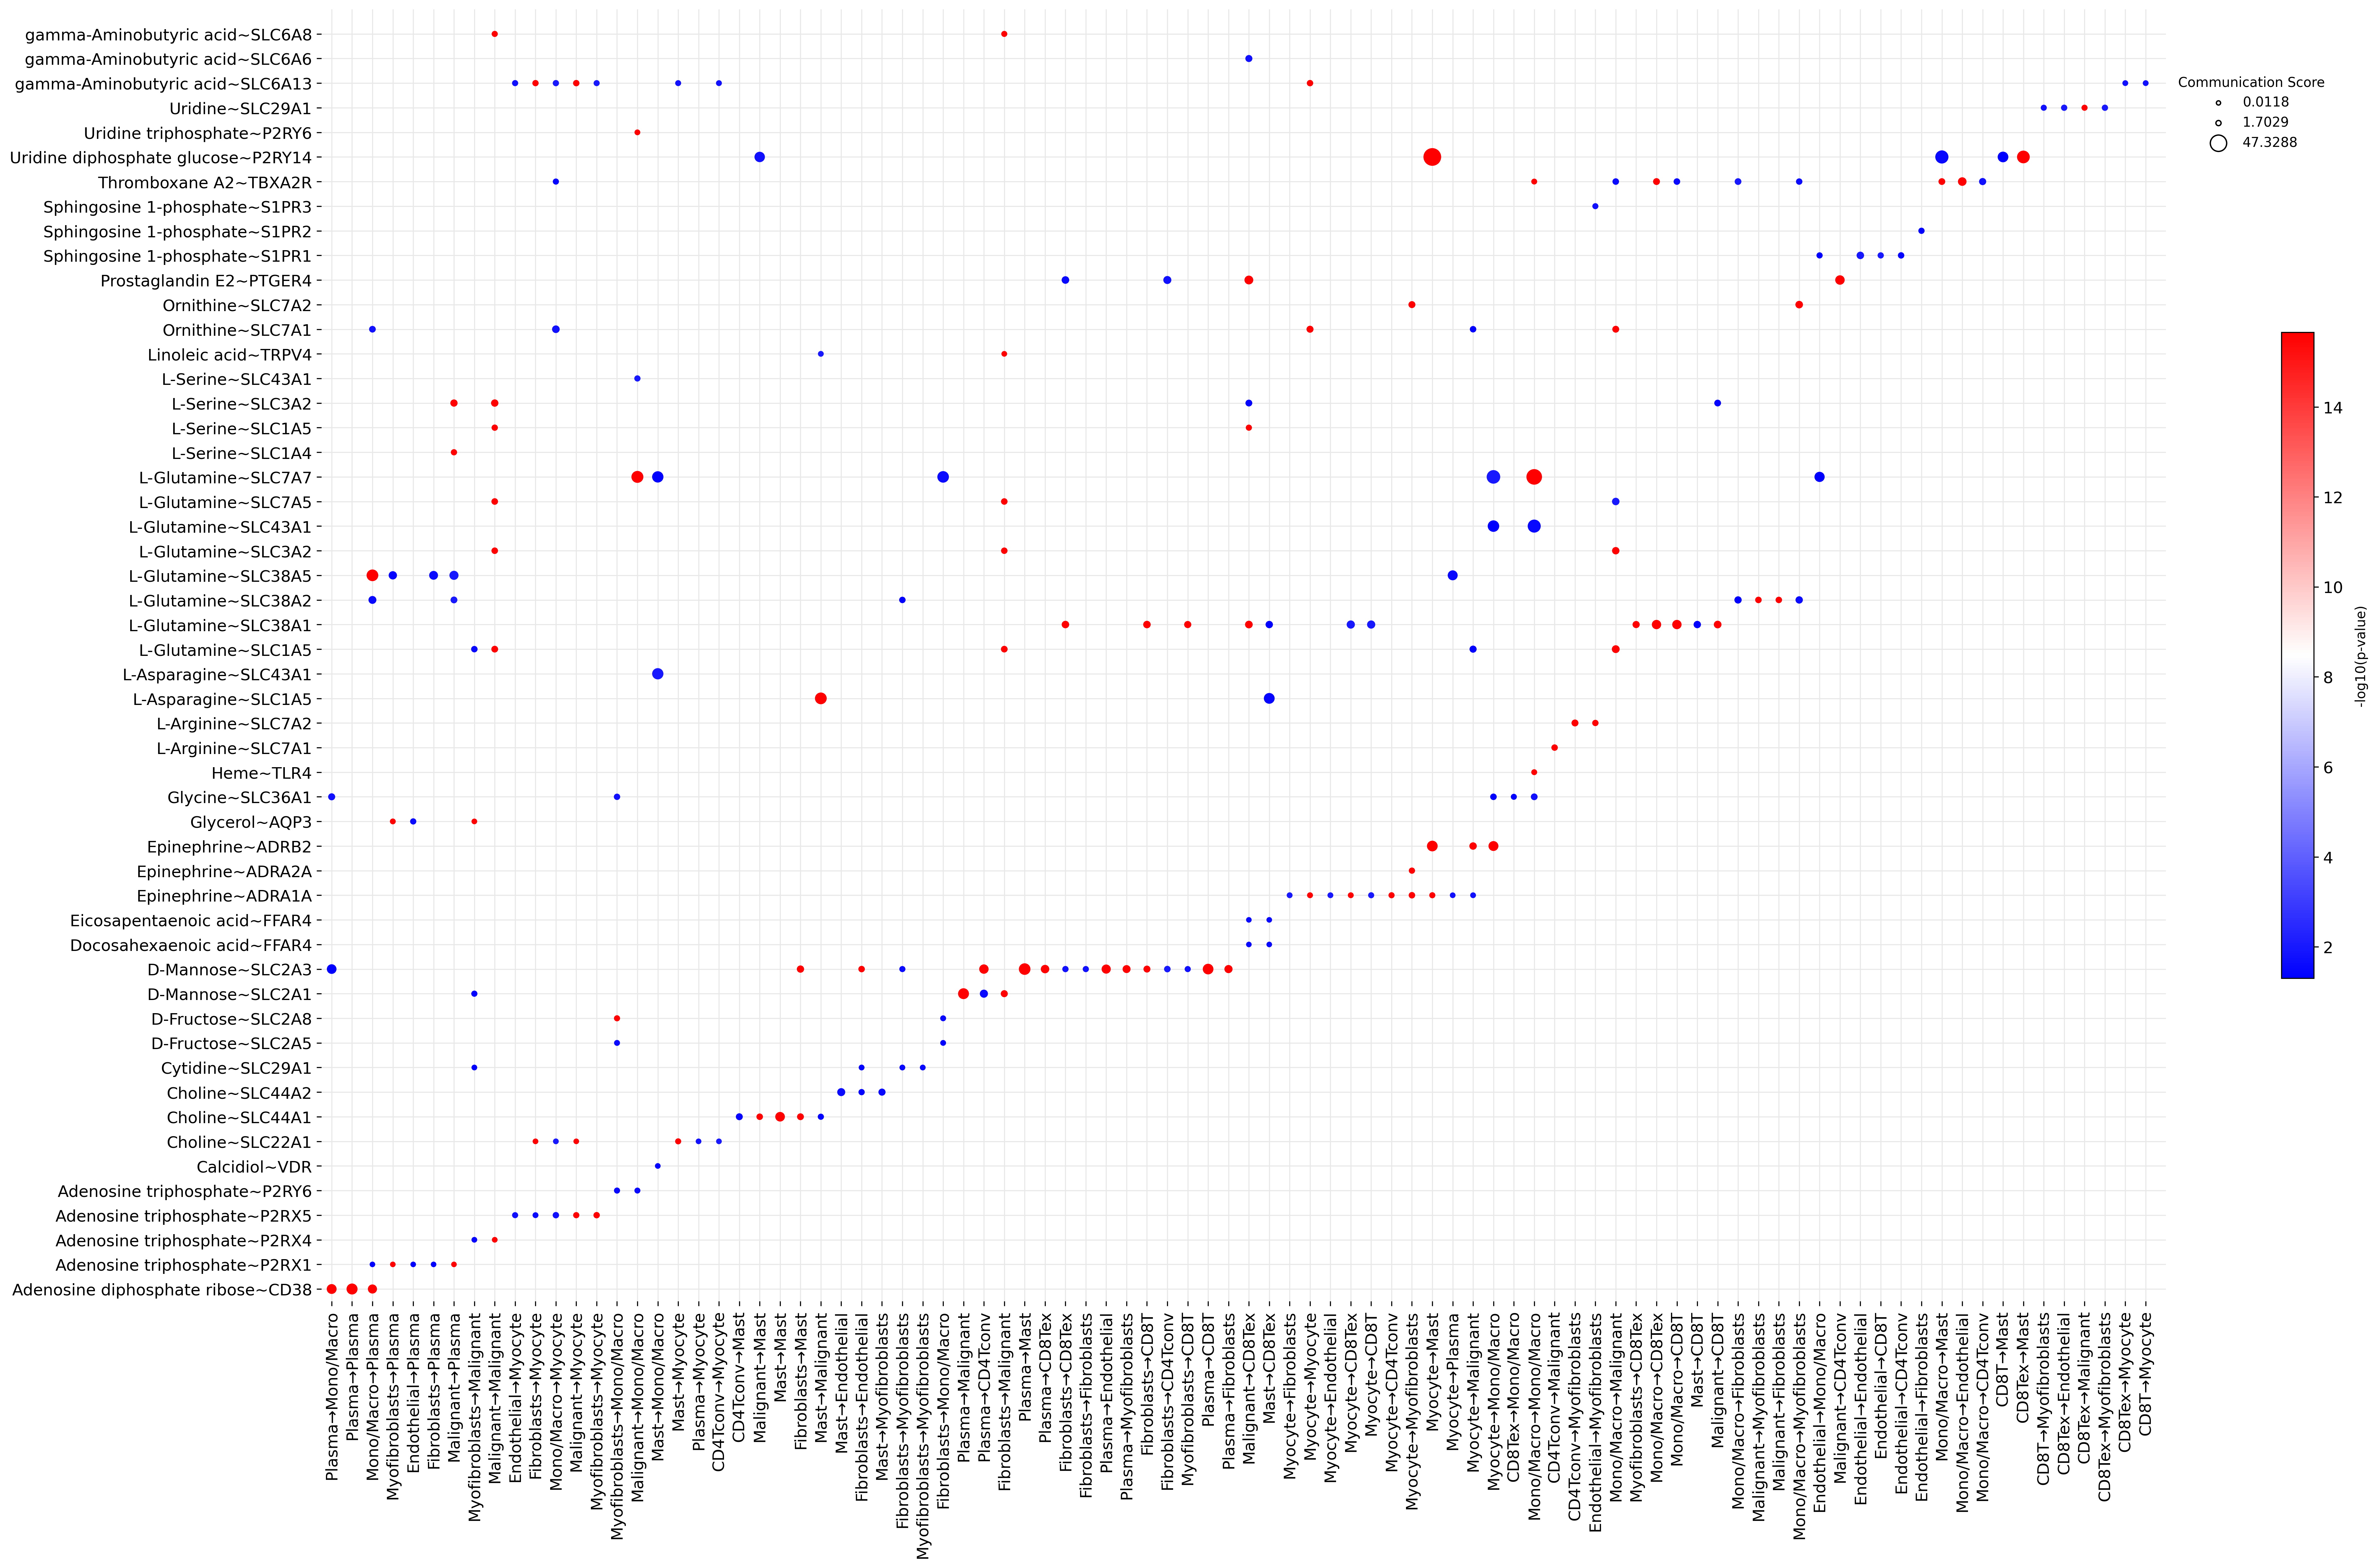

In [208]:
## Malignant cell was focused, use receiver_focus=[] to include all cell types
mebo_obj.commu_dotmap(
                sender_focus=[],
                metabolite_focus=[],
                sensor_focus=[],
                receiver_focus=[],
                and_or='and',
                pval_method='permutation_test_fdr',
                pval_cutoff=0.05,
                figsize='auto',
                cmap='bwr',
                node_size_norm=(10, 150),
                save=None,
                show_plot=True,
                comm_score_col='Commu_Score',
                comm_score_cutoff=0,
                swap_axis = False,
                return_fig = False
                )


#### Visualization of the communication flow from sender metabolite to sensor in receiver

[May 13, 2024 15:41:10]: plot flow plot to show the communications from Sender -> Metabolite -> Sensor -> Receiver


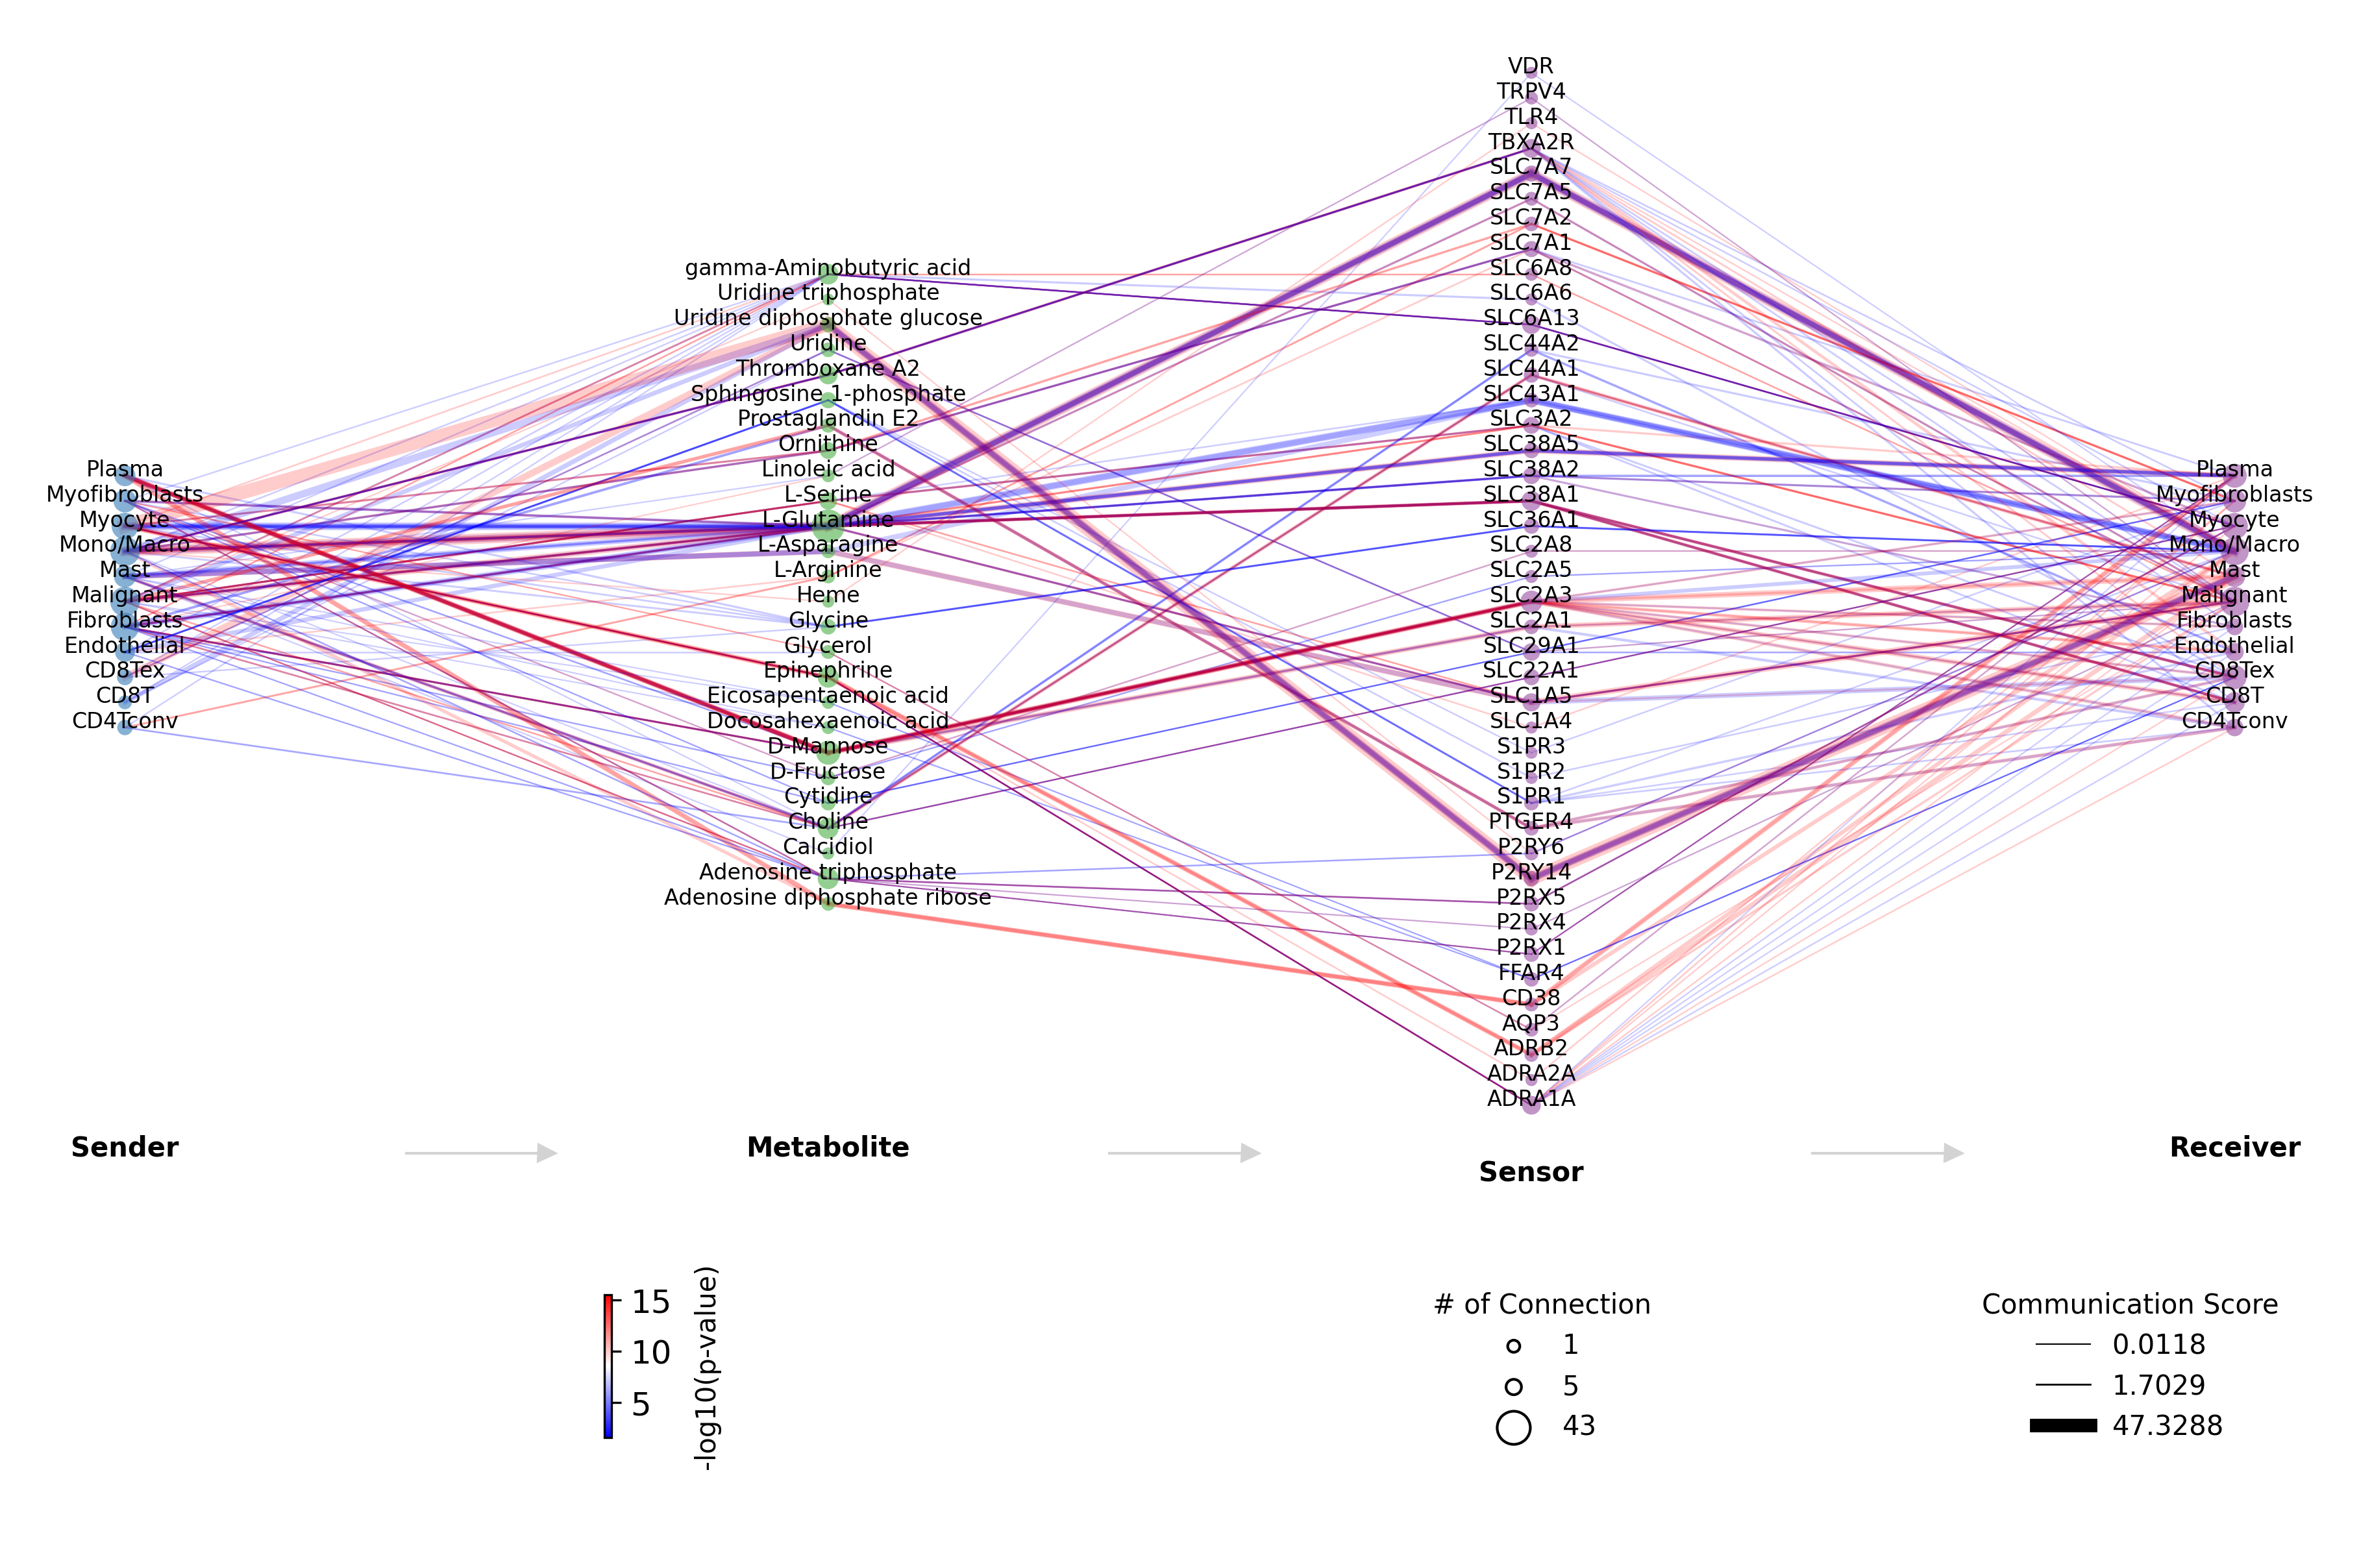

In [209]:
## Malignant cell was focused, use receiver_focus=[] to include all cell types
mebo_obj.FlowPlot(
                pval_method='permutation_test_fdr',
                pval_cutoff=0.05,
                sender_focus=[],
                metabolite_focus=[],
                sensor_focus=[],
                receiver_focus=[],
                remove_unrelevant = False,
                and_or='and',
                node_label_size=8,
                node_alpha=0.6,
                figsize='auto',
                node_cmap='Set1',
                line_cmap='bwr',
                line_vmin = None,
                line_vmax = 15.5,
                node_size_norm=(20, 150),
                linewidth_norm=(0.5, 5),
                save='test.pdf',
                show_plot=True,
                comm_score_col='Commu_Score',
                comm_score_cutoff=0,
                text_outline=False,
                return_fig = False
            )


#### Visualization of the metabolite level or sensor expression in cell groups


[May 13, 2024 15:41:57]: Warnings: no sensors to plot
[May 13, 2024 15:41:57]: Find metabolites ['Cytidine', 'Adenosine diphosphate ribose', 'Choline', 'Calcidiol', 'Adenosine triphosphate'] to plot violin


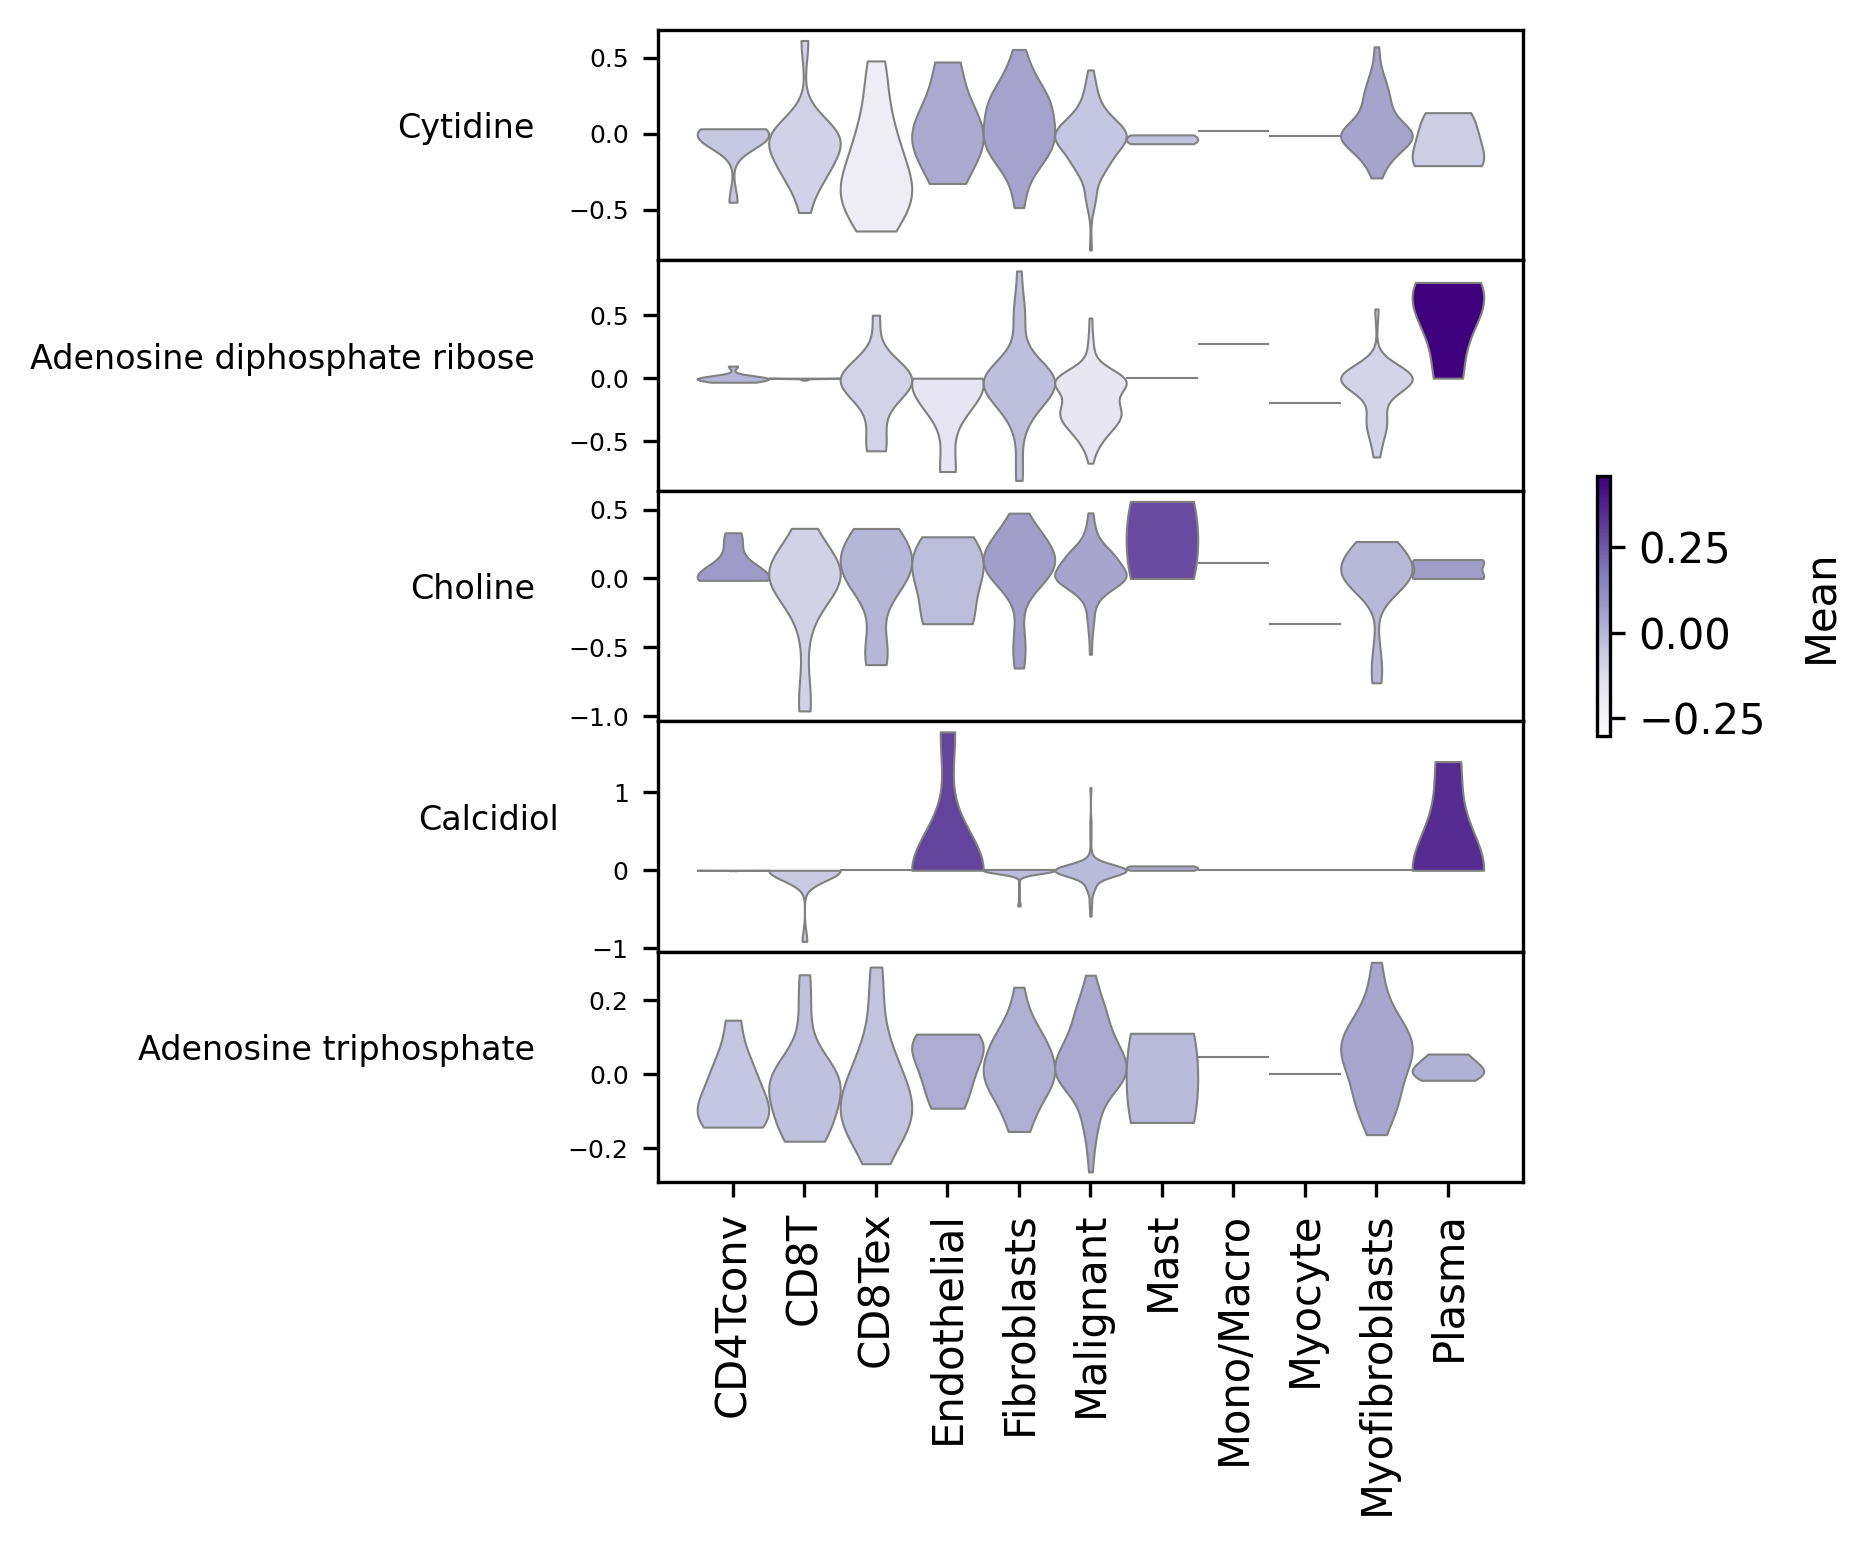

In [210]:
## violin plot to show the aggregated metabolite enzymes of informative metabolties in communication
### here we show five significant metabolites,
### users can pass several metabolites of interest by provide a list
commu_df = mebo_obj.commu_res.copy()
good_met = commu_df[(commu_df['permutation_test_fdr']<=0.05)]['Metabolite_Name'].sort_values().unique()

mebo_obj.violin_plot(
                    sensor_or_met=good_met[:5], ## only top 5 as example
                    cell_focus=[],
                    cmap=None,
                    vmin=None,
                    vmax=None,
                    figsize='auto',
                    cbar_title='',
                    save=None,
                    show_plot=True
                    )


[May 13, 2024 15:42:08]: Find genes Index(['CD38', 'AQP3', 'ADRA1A', 'ADRB2', 'ADRA2A'], dtype='object') to plot violin


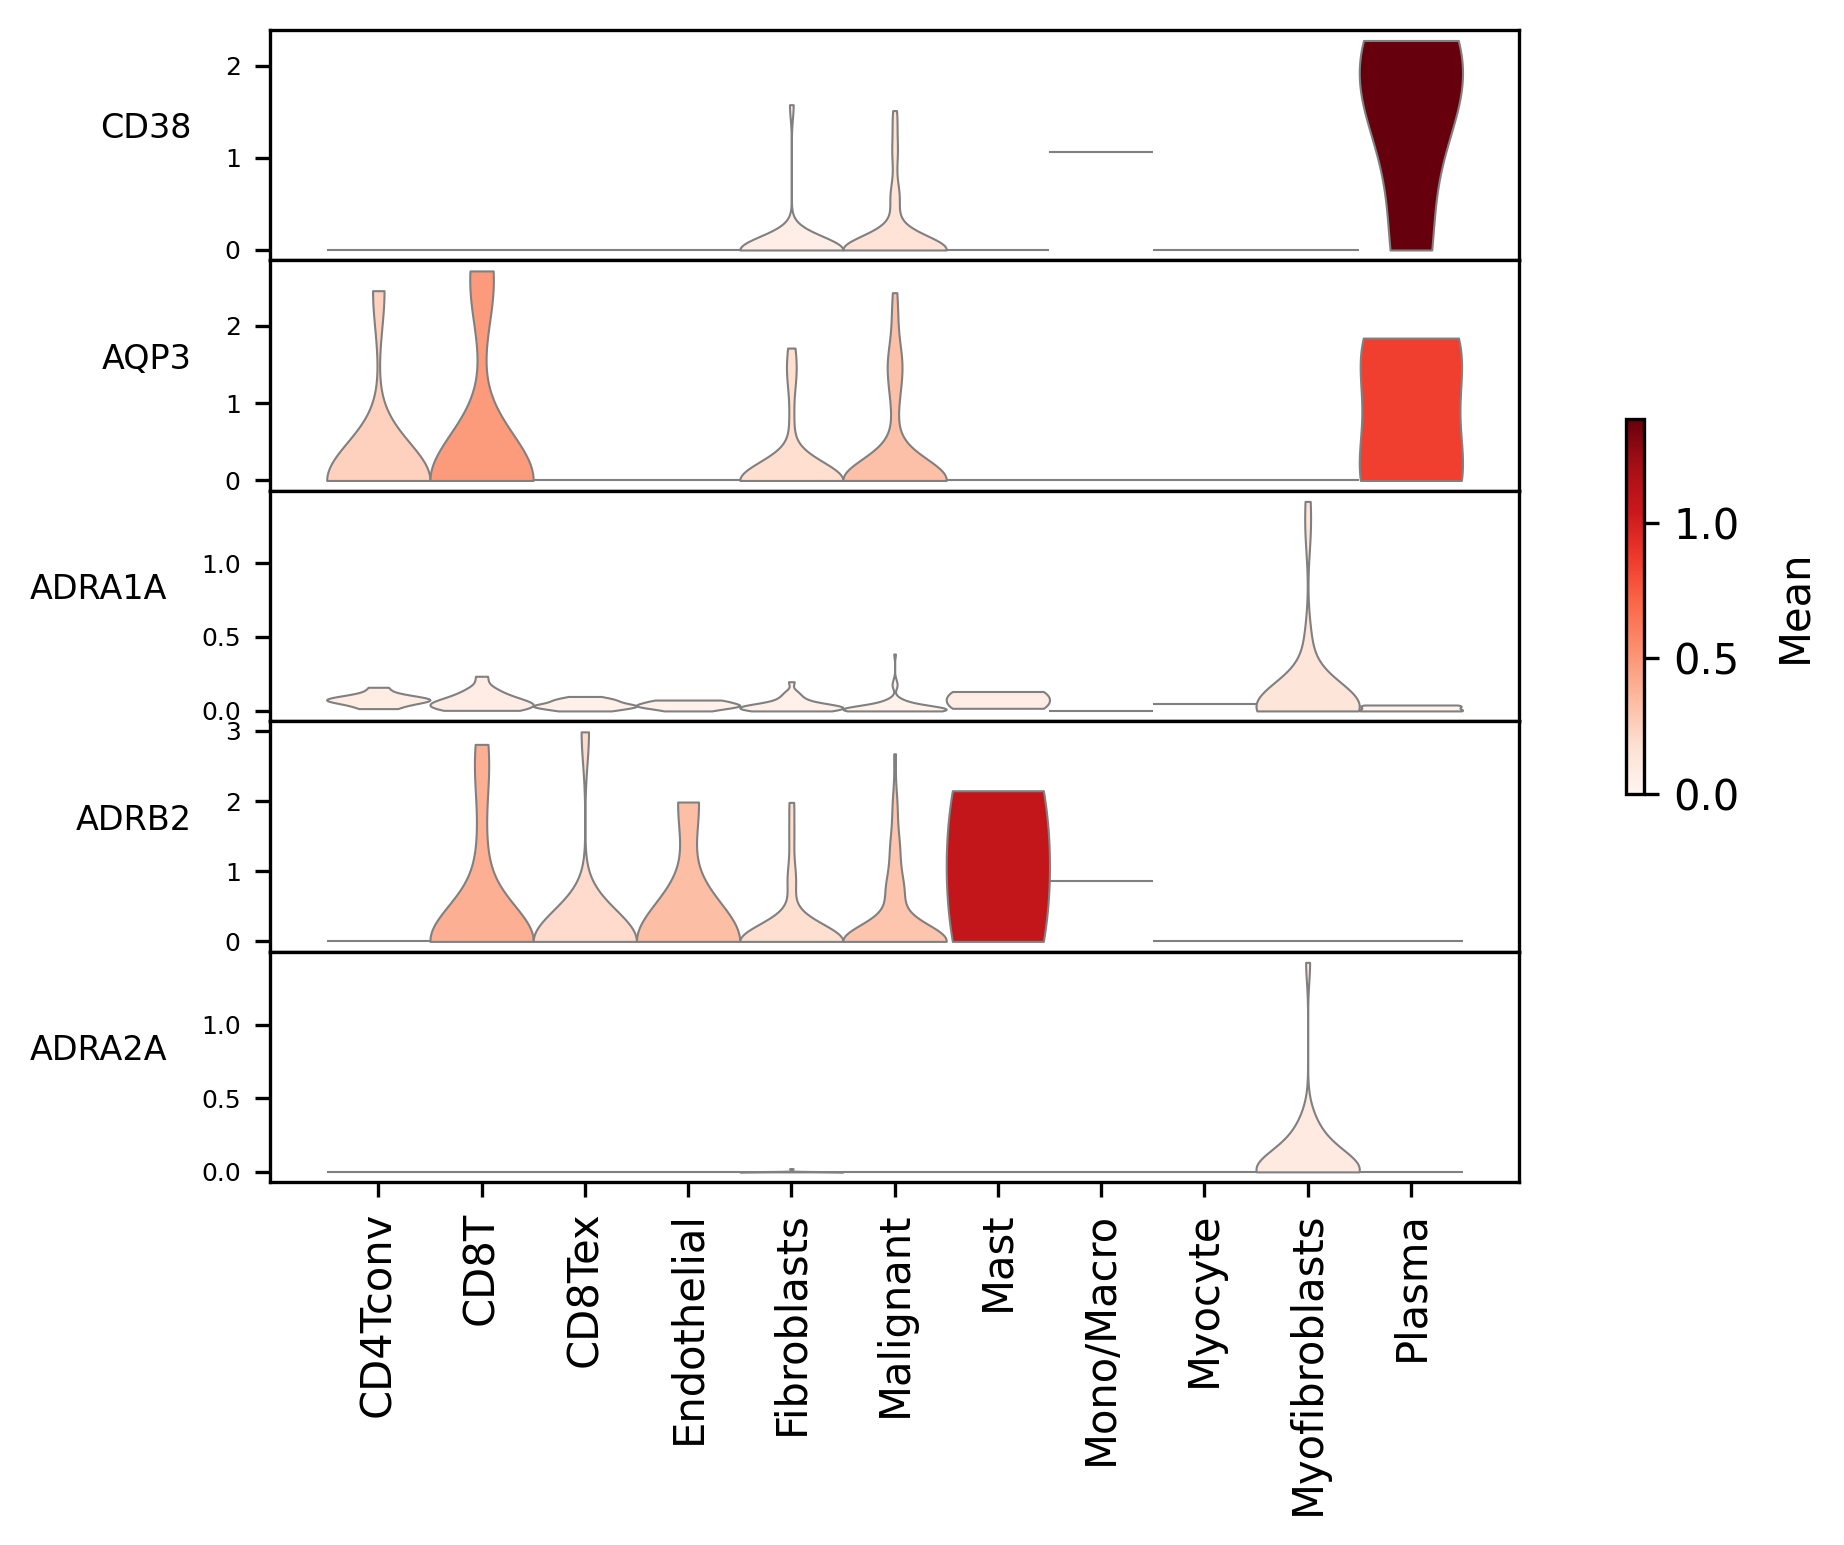

[May 13, 2024 15:42:09]: Warnings: no metabolites to plot


In [211]:
## violin plot to show the expression of informative sensors in communication

good_sensor = commu_df[(commu_df['permutation_test_fdr']<=0.05)]['Sensor'].sort_values().unique()

mebo_obj.violin_plot(
                    sensor_or_met=good_sensor[:5],## only top 5 as example
                    cell_focus=[],
                    cmap=None,
                    vmin=None,
                    vmax=None,
                    figsize='auto',
                    cbar_title='',
                    save=None,
                    show_plot=True
                    )


### 2.9 extract data and save figures


#### extract communication and write to a table:


In [18]:
### the updated and tidy communication result is in object, can be retreved by:
commu_res = mebo_obj.commu_res.copy()
## filter by FDR less than 0.05
commu_res = commu_res[commu_res['permutation_test_fdr']<=0.05]
## write to tsv file
commu_res.to_csv('communication_result.tsv', sep = '\t', index = None)


#### save figures
<p>Users can save figures by either providing by parameter 'save' for each plotting function, or save figure separately by hand, in this case, users need to set 'return_fig = True'</p>

###### Method 1: a example for providing filename by parameter


In [19]:
mebo_obj.eventnum_bar(
                    sender_focus=[],
                    metabolite_focus=[],
                    sensor_focus=[],
                    receiver_focus=[],
                    and_or='and',
                    pval_method='permutation_test_fdr',
                    pval_cutoff=0.05,
                    comm_score_col='Commu_Score',
                    comm_score_cutoff = 0,
                    cutoff_prop = 0.25,
                    figsize='auto',
                    ## Note that filename passed by save parameter:
                    save='mebocost_eventnum.pdf',
                    show_plot=False,
                    show_num = True,
                    include=['sender-receiver'],
                    group_by_cell=True,
                    colorcmap='tab20',
                    return_fig=False
                )




###### Method 2: a example for saving figures separately


In [20]:
fig = mebo_obj.eventnum_bar(
                    sender_focus=[],
                    metabolite_focus=[],
                    sensor_focus=[],
                    receiver_focus=[],
                    and_or='and',
                    pval_method='permutation_test_fdr',
                    pval_cutoff=0.05,
                    comm_score_col='Commu_Score',
                    comm_score_cutoff = 0,
                    cutoff_prop = 0.25,
                    figsize='auto',
                    save=None,
                    show_plot=False,
                    show_num = True,
                    include=['sender-receiver'],
                    group_by_cell=True,
                    colorcmap='tab20',
                    return_fig=False
                )
## save figure
fig.savefig('mebocost_eventnum.pdf')


#### 3 Change parameters to re-loaded object
<p>change or revise config file</p>
<p>If you changed the workspace compared to the one where you generated this object, or you want to change configure files (mebocost.conf), you may want to reset the path of the configure file, you can check the path of configure file in the current re-loaded object by:</p>

In [21]:
### If you changed the workspace compared to the one where you generated this object, 
### or you want to change configure files (mebocost.conf),
### you may want to reset the path of the configure file, 
### you can check the path of configure file in the current re-loaded object by:
print('config file path in the object:', mebo_obj.config_path)

#### if you do need to change, revise the mebocost.conf file first. 
### If done, pass the path to mebocost:

mebo_obj.config_path = './mebocost.conf'

#### then, re-load config files

mebo_obj._load_config_()


#### If you want to change parameters such as cutoff of sensor expression or metabolite aggregated enzyme expression


In [22]:
# ## if users want to adjust some parameters regarding cutoff of expression 
# ## and proportion of cells expressed to focus on highly confident ones,

# ## we save the original result in variable of original_result, 
# ## so additional filtering can be done on this data frame

# ## the cutoff of sensor expression and metabolite abundance 
# ## should really dependent onusers dataset

# ## exp_prop and met_prop have been saved in the mebocost object, 
# ## you can retreve by mebo_obj.exp_prop and mebo_obj.met_prop
# ## you also can re-calculate by changing the cutoff:

exp_prop, met_prop = mebo_obj._check_aboundance_(cutoff_exp = 0.1,
                                                   cutoff_met = 0.1)


## you can pass the exp_prop and met_prop to the function and 
## filter out bad communications under the cutoff
## here is the example to use newly calculated exp_prop and met_prop
## if you want to use previously calculated in mebocost object, 
## you can replace met_prop by mebo_obj.met_prop, same for exp_prop
## cutoff_prop here means the faction of cells in the cell group expressing the senser
## or having the abundant of metabolite
commu_res_new = mebo_obj._filter_lowly_aboundant_(pvalue_res = mebo_obj.original_result.copy(),
                                                    cutoff_prop = 0.25,
                                                    met_prop=met_prop,
                                                    exp_prop=exp_prop,
                                                    min_cell_number = 1
                                                 )

## update your commu_res in mebocost object, 
## so that the object can used to generate figure based on the updated data
mebo_obj.commu_res = commu_res_new.copy()

# ## change such parameters to narrow down to highly confident communications if you got a big number of communications in your data 


## constrain by eflux and influx if you have COMPASS result
updated_res = mebo_obj._ConstainFlux_(compass_folder='../data/demo/compass_res/',
                                    efflux_cut='auto',
                                    influx_cut='auto',
                                    inplace=False)
mebo_obj.commu_res = updated_res.copy()
